# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hallen Naafi Aliya Rachman
- **Email:** hallen21001@mail.unpad.ac.id
- **ID Dicoding:** hai_llenn

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa penyewaan sepeda pada tahun 2011 dan 2012?
2. Apakah terdapat hubungan antara musim dengan jumlah penyewa sepeda? Musim apa yang memiliki jumlah penyewa sepeda paling banyak dan paling sedikit?
3. Apakah terdapat hubungan antara kondisi cuaca dengan jumlah penyewa sepeda? Kondisi cuaca apa yang memiliki jumlah penyewa sepeda paling banyak dan paling sedikit?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data


Data yang digunakan adalah Bike Sharing Dataset yang diunduh dari link berikut :
https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view

#### day_df

In [ ]:
# Input data tabel day
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### hour_df

In [ ]:
# Input data tabel hour
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### day_df

In [ ]:
# Memeriksa tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

In [ ]:
# Memeriksa missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Jumlah data pada day_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya.

In [ ]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


- Tidak terdapat duplikasi data pada day_df.

In [ ]:
# Memeriksa parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Tidak terdapat keanehan nilai pada day_df.

#### hour_df

In [ ]:
# Memeriksa tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

In [ ]:
# Memeriksa missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Jumlah data pada hour_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya.

In [ ]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


- Tidak terdapat duplikasi data pada hour_df.

In [ ]:
# Memeriksa parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- Tidak terdapat keanehan nilai pada hour_df.

### Cleaning Data

#### day_df

In [ ]:
# Mengubah tipe data pada kolom dteday menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

- Tipe data untuk kolom dteday sudah diubah menjadi datetime.

In [ ]:
# Mengubah isi data pada kolom season, yr, mnth, weekday, weathersit
day_df.season.replace([1,2,3,4],["Spring", "Summer", "Fall", "Winter"], inplace=True)
day_df.yr.replace([0,1],["2011", "2012"], inplace=True)
day_df.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], inplace=True)
day_df.weekday.replace([0,1,2,3,4,5,6],["Sun","Mon","Tue","Wed","Thu","Fri","Sat"], inplace=True)
day_df.weathersit.replace([1,2,3,4],["Clear", "Cloudy", "Light Rain", "Heavy Rain"], inplace=True)

In [ ]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Spring,2012,Dec,0,Thu,1,Cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Spring,2012,Dec,0,Fri,1,Cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Spring,2012,Dec,0,Sat,0,Cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Spring,2012,Dec,0,Sun,0,Clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


- Isi data untuk kolom season, yr, mnth, weekday, dan weathersit sudah diubah agar lebih mudah dipahami.



#### hour_df

In [ ]:
# Mengubah tipe data pada kolom dteday menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

- Tipe data untuk kolom dteday sudah diubah menjadi datetime.

In [ ]:
# Mengubah isi data pada kolom season, yr, mnth, weekday, weathersit
hour_df.season.replace([1,2,3,4],["Spring", "Summer", "Fall", "Winter"], inplace=True)
hour_df.yr.replace([0,1],["2011", "2012"], inplace=True)
hour_df.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], inplace=True)
hour_df.weekday.replace([0,1,2,3,4,5,6],["Sun","Mon","Tue","Wed","Thu","Fri","Sat"], inplace=True)
hour_df.weathersit.replace([1,2,3,4],["Clear", "Cloudy", "Light Rain", "Heavy Rain"], inplace=True)

In [ ]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Spring,2012,Dec,19,0,Mon,1,Cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Spring,2012,Dec,20,0,Mon,1,Cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Spring,2012,Dec,21,0,Mon,1,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Spring,2012,Dec,22,0,Mon,1,Clear,0.26,0.2727,0.56,0.1343,13,48,61


- Isi data untuk kolom season, yr, mnth, weekday, dan weathersit sudah diubah agar lebih mudah dipahami.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [51]:
# Memeriksa parameter statistik
day_df.describe(include="all")

<ipython-input-51-61156b434408>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,Jan,NaN,Sat,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,0.167155,NaN,0.465233,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [52]:
# Demografi penyewa berdasarkan tahun dan bulan
day_df.groupby(by=["yr", "mnth"]).agg({
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
    "cnt": ["sum", "mean"]
})

casual              registered                  cnt             
             sum         mean        sum         mean     sum         mean
yr   mnth                                                                 
2011 Apr   22346   744.866667      72524  2417.466667   94870  3162.333333
     Aug   28842   930.387097     107849  3479.000000  136691  4409.387097
     Dec    8448   272.516129      78875  2544.354839   87323  2816.870968
     Feb    6242   222.928571      41973  1499.035714   48215  1721.964286
     Jan    3073    99.129032      35116  1132.774194   38189  1231.903226
     Jul   36452  1175.870968     104889  3383.516129  141341  4559.387097
     Jun   30612  1020.400000     112900  3763.333333  143512  4783.733333
     Mar   12826   413.741935      51219  1652.225806   64045  2065.967742
     May   31050  1001.612903     104771  3379.709677  135821  4381.322581
     Nov   15594   519.800000      86573  2885.766667  102167  3405.566667
     Oct   25222   813.612903      98289  3170.612903  123511  3984.225806
     Sep   26545   884.833333     100873  3362.433333  127418  4247.266667
2012 Apr   38456  1281.866667     135768  4525.600000  174224  5807.466667
     Aug   43197  1393.451613     171306  5526.000000  214503  6919.451613
     Dec   13245   427.258065     110468  3563.483871  123713  3990.741935
     Feb    8721   300.724138      94416  3255.724138  103137  3556.448276
     Jan    8969   289.322581      87775  2831.451613   96744  3120.774194
     Jul   41705  1345.322581     161902  5222.645161  203607  6567.967742
     Jun   43294  1443.133333     159536  5317.866667  202830  6761.000000
     Mar   31618  1019.935484     133257  4298.612903  164875  5318.548387
     May   44235  1426.935484     151630  4891.290323  195865  6318.225806
     Nov   21009   700.300000     131655  4388.500000  152664  5088.800000
     Oct   34538  1114.129032     164303  5300.096774  198841  6414.225806
     Sep   43778  1459.266667     174795  5826.500000  218573  7285.766667

In [53]:
# Demografi penyewa berdasarkan musim
day_df.groupby(by="season").agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
})

cnt                                      
            sum   max   min         mean          std
season                                               
Fall    1061129  8714  1115  5644.303191  1459.800381
Spring   471348  7836   431  2604.132597  1399.942119
Summer   918589  8362   795  4992.331522  1695.977235
Winter   841613  8555    22  4728.162921  1699.615261

In [54]:
# Persebaran jumlah penyewa berdasarkan musim
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64

In [55]:
# Demografi penyewa berdasarkan kondisi cuaca
day_df.groupby(by="weathersit").agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
})

cnt                                     
                sum   max  min         mean          std
weathersit                                              
Clear       2257952  8714  431  4876.786177  1879.483989
Cloudy       996858  8362  605  4035.862348  1809.109918
Light Rain    37869  4639   22  1803.285714  1240.284449

In [56]:
# Persebaran jumlah penyewa berdasarkan kondisi cuaca
day_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

weathersit
Clear         2257952
Cloudy         996858
Light Rain      37869
Name: cnt, dtype: int64

In [57]:
# Demografi penyewa berdasarkan musim dan kondisi cuaca
day_df.groupby(by=["season", "weathersit"]).agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
})

cnt                                      
                      sum   max   min         mean          std
season weathersit                                              
Fall   Clear       799443  8714  3285  5878.257353  1356.647125
       Cloudy      250679  7582  1115  5222.479167  1431.160502
       Light Rain   11007  4459  1842  2751.750000  1199.339923
Spring Clear       312036  6312   431  2811.135135  1409.960622
       Cloudy      155573  7836   605  2357.166667  1313.332082
       Light Rain    3739  2169   441   934.750000   826.272100
Summer Clear       626986  8294  2028  5548.548673  1467.655078
       Cloudy      288096  8362  1471  4236.705882  1579.038070
       Light Rain    3507  1685   795  1169.000000   461.679543
Winter Clear       519487  8555  1495  5043.563107  1595.693909
       Cloudy      302510  7852  1096  4654.000000  1523.445365
       Light Rain   19616  4639    22  1961.600000  1329.287378

In [58]:
# Demografi penyewa berdasarkan hari kerja
day_df.groupby(by=["weekday", "workingday"]).agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
})

cnt                                      
                       sum   max   min         mean          std
weekday workingday                                              
Fri     0             6494  3368  3126  3247.000000   171.119841
        1           481296  8362  1167  4718.588235  1881.876462
Mon     0            59605  6370  1000  3973.666667  2061.976779
        1           395898  7525    22  4398.866667  1749.872921
Sat     0           477807  8714   627  4550.542857  2196.693009
Sun     0           444027  8227   605  4228.828571  1872.496629
Thu     0             3920  2425  1495  1960.000000   657.609307
        1           481475  7804   431  4720.343137  1919.276841
Tue     0             1013  1013  1013  1013.000000          NaN
        1           468096  7767   683  4544.621359  1802.560842
Wed     0             7403  7403  7403  7403.000000          NaN
        1           465645  8173   441  4520.825243  2028.275446

In [59]:
# Demografi penyewa berdasarkan hari libur
day_df.groupby(by=["weekday", "holiday"]).agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
})

cnt                                      
                    sum   max   min         mean          std
weekday holiday                                              
Fri     0        481296  8362  1167  4718.588235  1881.876462
        1          6494  3368  3126  3247.000000   171.119841
Mon     0        395898  7525    22  4398.866667  1749.872921
        1         59605  6370  1000  3973.666667  2061.976779
Sat     0        477807  8714   627  4550.542857  2196.693009
Sun     0        444027  8227   605  4228.828571  1872.496629
Thu     0        481475  7804   431  4720.343137  1919.276841
        1          3920  2425  1495  1960.000000   657.609307
Tue     0        468096  7767   683  4544.621359  1802.560842
        1          1013  1013  1013  1013.000000          NaN
Wed     0        465645  8173   441  4520.825243  2028.275446
        1          7403  7403  7403  7403.000000          NaN

### Explore hour_df

In [60]:
# Memeriksa parameter statistik
hour_df.describe(include="all")

<ipython-input-60-a4892d6263db>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,May,NaN,NaN,Sat,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,0.167165,NaN,0.465431,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [61]:
# Demografi penyewa berdasarkan tahun, bulan, dan jam
hour_df.groupby(by=["yr", "mnth", "hr"]).agg({
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
    "cnt": ["sum", "mean"]
})

casual            registered                cnt            
                sum       mean        sum        mean    sum        mean
yr   mnth hr                                                            
2011 Apr  0     219   7.300000        778   25.933333    997   33.233333
          1     166   5.533333        444   14.800000    610   20.333333
          2     158   5.266667        357   11.900000    515   17.166667
          3      74   2.551724        152    5.241379    226    7.793103
          4      38   1.266667        100    3.333333    138    4.600000
...             ...        ...        ...         ...    ...         ...
2012 Sep  19   2270  75.666667      12819  427.300000  15089  502.966667
          20   1569  52.300000       8984  299.466667  10553  351.766667
          21   1131  37.700000       6519  217.300000   7650  255.000000
          22    952  31.733333       4805  160.166667   5757  191.900000
          23    635  21.166667       3284  109.466667   3919  130.633333

[576 rows x 6 columns]

In [62]:
# Demografi penyewa berdasarkan musim
hour_df.groupby(by="season").agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
})

cnt                                 
            sum  max min        mean         std
season                                          
Fall    1061129  977   1  236.016237  197.711630
Spring   471348  801   1  111.114569  119.224010
Summer   918589  957   1  208.344069  188.362473
Winter   841613  967   1  198.868856  182.967972

In [63]:
# Persebaran jumlah penyewa berdasarkan musim
hour_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64

In [64]:
# Demografi penyewa berdasarkan kondisi cuaca
hour_df.groupby(by=["weathersit"]).agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
})

cnt                                 
                sum  max min        mean         std
weathersit                                          
Clear       2338173  977   1  204.869272  189.487773
Cloudy       795952  957   1  175.165493  165.431589
Heavy Rain      223  164  23   74.333333   77.925178
Light Rain   158331  891   1  111.579281  133.781045

In [65]:
# Persebaran jumlah penyewa berdasarkan kondisi cuaca
hour_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

weathersit
Clear         2338173
Cloudy         795952
Light Rain     158331
Heavy Rain        223
Name: cnt, dtype: int64

In [66]:
# Demografi penyewa berdasarkan musim dan kondisi cuaca
hour_df.groupby(by=["season", "weathersit"]).agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
})

cnt                                 
                      sum  max min        mean         std
season weathersit                                         
Fall   Clear       801941  977   1  244.494207  201.732720
       Cloudy      212932  868   2  224.848997  185.406665
       Light Rain   46256  891   1  171.955390  175.871513
Spring Clear       325278  801   1  122.055535  127.384258
       Cloudy      124205  712   1  103.074689  106.154745
       Heavy Rain     223  164  23   74.333333   77.925178
       Light Rain   21642  520   1   58.650407   74.793446
Summer Clear       664463  873   1  232.410983  198.312457
       Cloudy      207363  957   1  181.261364  164.832349
       Light Rain   46763  782   1  115.179803  130.760396
Winter Clear       546491  967   1  209.463779  190.891851
       Cloudy      251452  905   1  201.483974  173.833617
       Light Rain   43670  856   1  116.453333  127.471365

In [67]:
# Demografi penyewa berdasarkan jam
hour_df.groupby(by="hr").agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
})

cnt                                 
       sum  max min        mean         std
hr                                         
0    39130  283   2   53.898072   42.307910
1    24164  168   1   33.375691   33.538727
2    16352  132   1   22.869930   26.578642
3     8174   79   1   11.727403   13.239190
4     4428   28   1    6.352941    4.143818
5    14261   66   1   19.889819   13.200765
6    55132  213   1   76.044138   55.084348
7   154171  596   1  212.064649  161.441936
8   261001  839   5  359.011004  235.189285
9   159438  426  14  219.309491   93.703458
10  126257  539   8  173.668501  102.205413
11  151320  663  10  208.143054  127.495536
12  184414  776   3  253.315934  145.081134
13  184919  760  11  253.661180  148.107657
14  175652  750  12  240.949246  147.271574
15  183149  750   7  251.233196  144.632541
16  227748  783  11  311.983562  148.682618
17  336860  976  15  461.452055  232.656611
18  309772  977  23  425.510989  224.639304
19  226789  743  11  311.523352  161.050359
20  164550  567  11  226.030220  119.670164
21  125445  584   6  172.314560   89.788893
22   95612  502   9  131.335165   69.937782
23   63941  256   2   87.831044   50.846889

## Visualization & Explanatory Analysis

### day_df

### Pertanyaan 1: Bagaimana performa penyewaan sepeda pada tahun 2011 dan 2012?

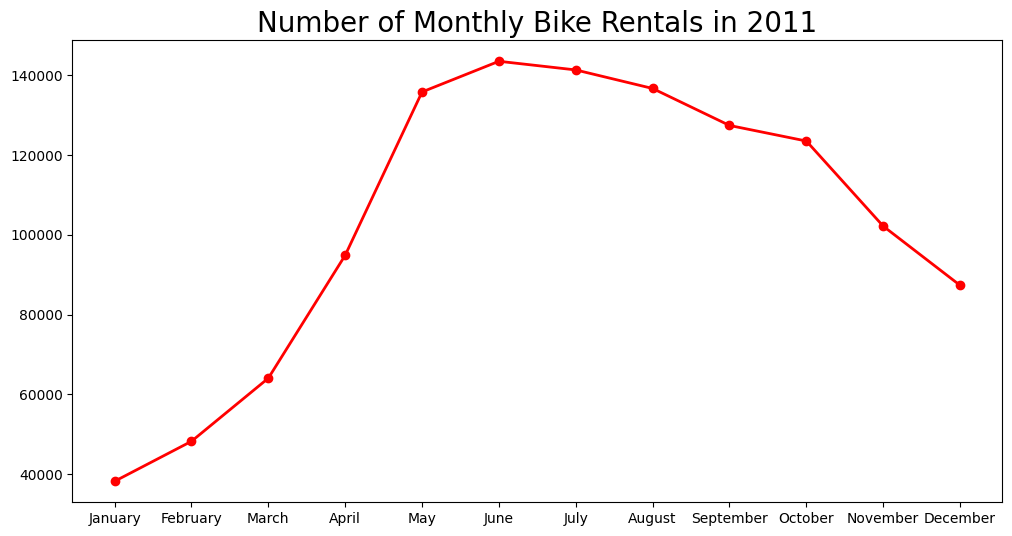

In [69]:
# Line Chart Jumlah Penyewa Sepeda per bulan Tahun 2011
monthly_rental_df = day_df[day_df['yr'] == '2011'].resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "cnt": "sum"
})
monthly_rental_df.index = monthly_rental_df.index.strftime('%B')

monthly_rental_df = monthly_rental_df.reset_index()
monthly_rental_df.rename(columns={
    "instant": "record_index",
    "cnt": "rental_count"
}, inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(monthly_rental_df["dteday"], monthly_rental_df["rental_count"], marker='o', linewidth=2, color="#FF0000")
plt.title("Number of Monthly Bike Rentals in 2011", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

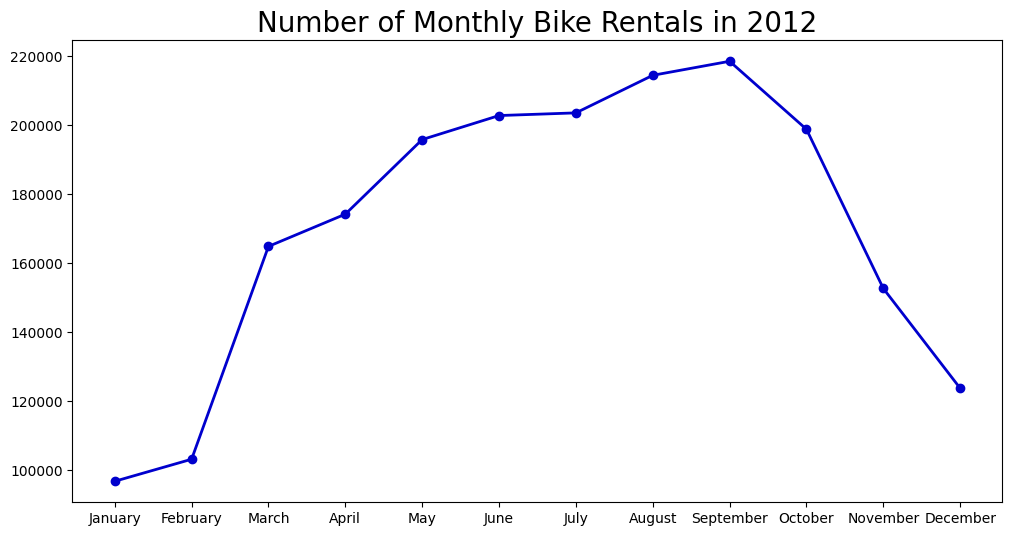

In [70]:
# Line Chart Jumlah Penyewa Sepeda per bulan Tahun 2012
monthly_rental_df = day_df[day_df['yr'] == '2012'].resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "cnt": "sum"
})
monthly_rental_df.index = monthly_rental_df.index.strftime('%B')

monthly_rental_df = monthly_rental_df.reset_index()
monthly_rental_df.rename(columns={
    "instant": "record_index",
    "cnt": "rental_count"
}, inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(monthly_rental_df["dteday"], monthly_rental_df["rental_count"], marker='o', linewidth=2, color="#0000CD")
plt.title("Number of Monthly Bike Rentals in 2012", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Apakah terdapat hubungan antara musim dengan jumlah penyewa sepeda? Musim apa yang memiliki jumlah penyewa sepeda paling banyak dan paling sedikit?


<ipython-input-71-9588140a8143>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-71-9588140a8143>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x/100) for x in plt.gca().get_yticks()])


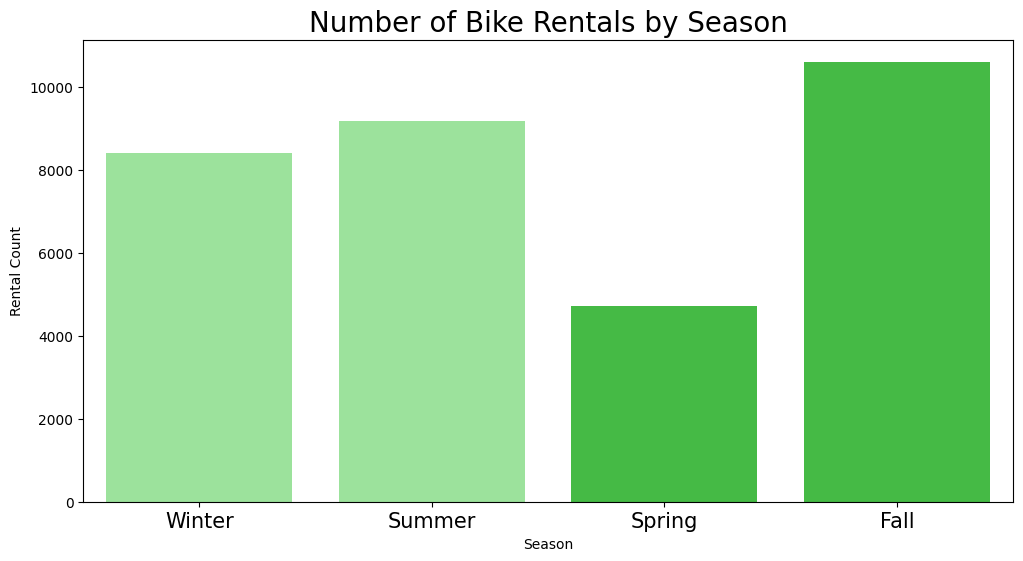

In [71]:
# Bar Chart Jumlah Penyewa Sepeda berdasarkan Musim
byseason_df = day_df.groupby(by="season").cnt.sum().reset_index()
byseason_df.rename(columns={
    "cnt": "rental_count"
}, inplace=True)

plt.figure(figsize=(12, 6))
colors = ["#90EE90", "#90EE90", "#32CD32", "#32CD32"]

sns.barplot(
    y="rental_count",
    x="season",
    data=byseason_df.sort_values(by="season", ascending=False),
    palette=colors
)

plt.title("Number of Bike Rentals by Season", loc="center", fontsize=20)
plt.ylabel("Rental Count")
plt.xlabel("Season")
plt.tick_params(axis='x', labelsize=15)
plt.gca().set_yticklabels(['{:.0f}'.format(x/100) for x in plt.gca().get_yticks()])
plt.show()


### Pertanyaan 3: Apakah terdapat hubungan antara kondisi cuaca dengan jumlah penyewa sepeda? Kondisi cuaca apa yang memiliki jumlah penyewa sepeda paling banyak dan paling sedikit?

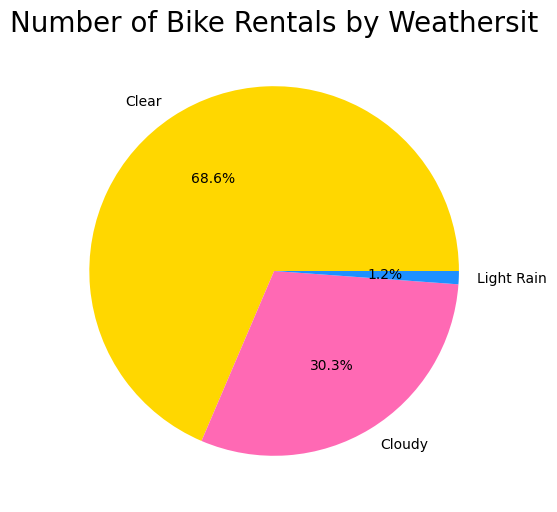

In [72]:
# Pie Chart Jumlah Penyewa Sepeda berdasarkan Kondisi Cuaca
byweathersit_df = day_df.groupby(by="weathersit").cnt.sum().reset_index()
byweathersit_df.rename(columns={
    "cnt": "rental_count"
}, inplace=True)

plt.figure(figsize=(6, 6))
colors = ["#FFD700", "#FF69B4", "#1E90FF", "#32CD32"]
plt.pie(byweathersit_df["rental_count"], labels=byweathersit_df["weathersit"], colors=colors, autopct='%1.1f%%')
plt.title("Number of Bike Rentals by Weathersit", fontsize=20)
plt.show()


## Analisis Lanjutan

### RFM Analysis

In [73]:
today = max(day_df['dteday'])
rfm_df = day_df.groupby('registered').agg({
    'dteday': lambda x: (today - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'cnt': 'sum'  # Monetary
}).reset_index()

rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0          20       63          1        22
1         416      704          1       431
2         432        5          1       441
3         451      372          1       754
4         472      705          1       506


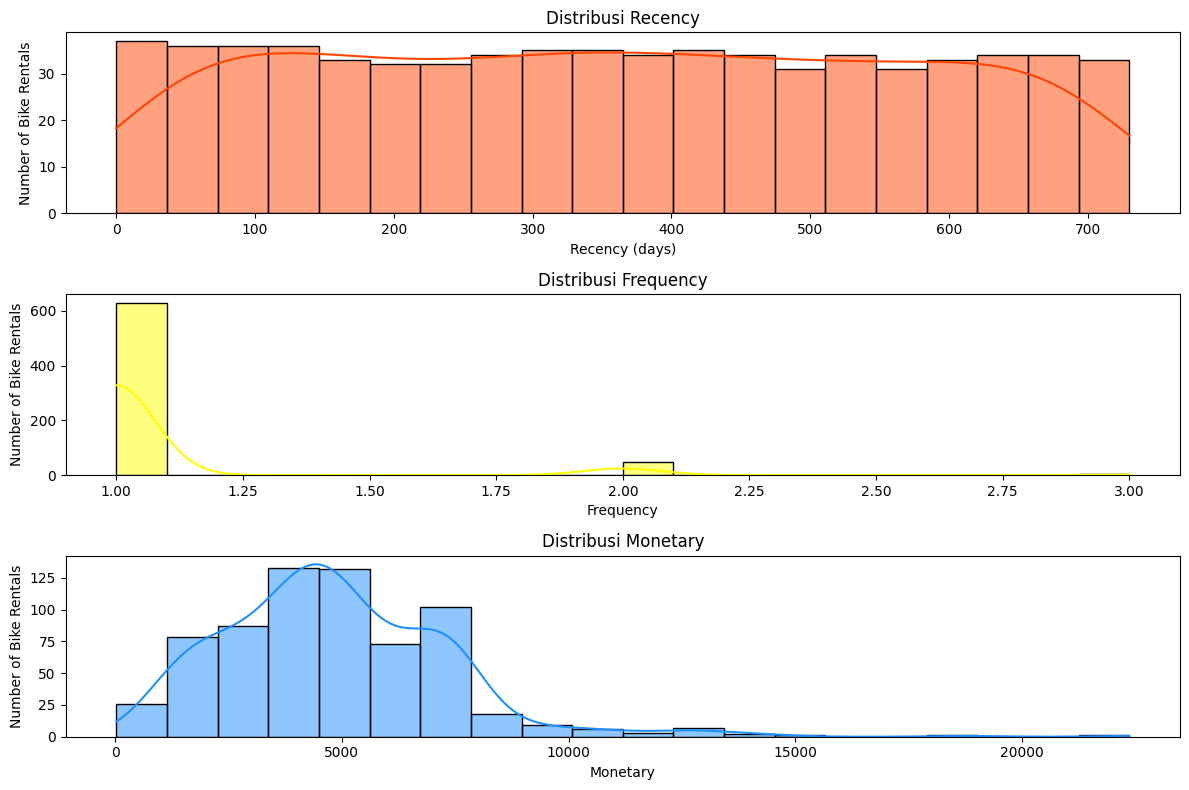

In [74]:
plt.figure(figsize=(12, 8))

# Diagram batang untuk Recency
plt.subplot(3, 1, 1)
sns.histplot(rfm_df['Recency'], bins=20, kde=True, color='orangered')
plt.title('Distribusi Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Number of Bike Rentals')

# Diagram batang untuk Frequency
plt.subplot(3, 1, 2)
sns.histplot(rfm_df['Frequency'], bins=20, kde=True, color="yellow")
plt.title('Distribusi Frequency')
plt.xlabel('Frequency')
plt.ylabel('Number of Bike Rentals')

# Diagram batang untuk Monetary
plt.subplot(3, 1, 3)
sns.histplot(rfm_df['Monetary'], bins=20, kde=True, color='dodgerblue')
plt.title('Distribusi Monetary')
plt.xlabel('Monetary')
plt.ylabel('Number of Bike Rentals')

plt.tight_layout()
plt.show()

In [ ]:
day_df.to_csv("day_data.csv", index=False)

## Conclusion

### day_df

### Pertanyaan 1
Bagaimana performa penyewaan sepeda pada tahun 2011 dan 2012?
- Performa penyewaan sepeda pada tahun 2011 menunjukkan kenaikan dari bulan Januari hingga Juni, namun mengalami penurunan dari bulan Juli hingga Desember. Jumlah penyewaan sepeda paling tinggi terjadi pada bulan Juni, sementara jumlah penyewaan paling rendah tercatat pada bulan Januari.
- Sementara itu, pada tahun 2012, performa penyewaan sepeda juga mengalami kenaikan mulai dari bulan Januari hingga September, namun mengalami penurunan dari bulan Oktober hingga Desember. Jumlah penyewaan sepeda mencapai puncaknya pada bulan September.
- Dari pola kenaikan dan penurunan yang teramati, dapat disimpulkan bahwa performa penyewaan sepeda dipengaruhi oleh faktor-faktor lainnya seperti musim, kondisi cuaca, hari kerja, dan lain-lain yang terjadi dari waktu ke waktu.


### Pertanyaan 2
Apakah terdapat hubungan antara musim dengan jumlah penyewa sepeda? Musim apa yang memiliki jumlah penyewa sepeda paling banyak dan paling sedikit?
- Didapatkan bahwa terdapat hubungan antara musim dengan jumlah penyewa sepeda. Dengan kata lain, variabel musim memiliki pengaruh terhadap jumlah penyewa seped
- Musim gugur memiliki jumlah penyewa sepeda paling banyak sementara musim semi memiliki jumlah penyewa sepeda paling sedikit.

### Pertanyaan 3
Apakah terdapat hubungan antara kondisi cuaca dengan jumlah penyewa sepeda? Kondisi cuaca apa yang memiliki jumlah penyewa sepeda paling banyak dan paling sedikit?
- Didapatkan bahwa terdapat hubungan antara kondisi cuaca dengan jumlah penyewa sepeda. Dengan kata lain, variabel kondisi cuaca memiliki pengaruh terhadap jumlah penyewa sepeda.
- Kondisi cuaca cerah memiliki jumlah penyewa sepeda paling banyak sementara kondisi cuaca hujan lebat memiliki jumlah penyewa sepeda paling sedikit/tidak ada yang menyewa, mungkin karena cuaca yang tidak mendukung untuk bersepeda.